# Plot results from Calibrated XGBoost Imputed model

In [22]:
import pandas as pd
import numpy as np
import pickle

# import custom functions
import sys
sys.path.append('../../onc_functions')

from plot_functions import (onc_plot_calibration_curve, 
                            onc_calc_cm, 
                            onc_plot_roc, 
                            onc_plot_risk,
                            onc_plot_roc_no_threshold)

In [14]:
# load results from the calibrated model
with open('./roc_results/y_calibrated_xgb_imputed.pickle', 'rb') as picklefile:  
            calibrated_results = pickle.load(picklefile)
calibrated_results.head()

,score,y,usrds_id,subset,p_calibrated
0,0.467093,1,31089.0,9,0.215902
3,0.225663,0,50506.0,9,0.081170
9,0.404925,0,157169.0,9,0.170539
12,0.115172,0,310420.0,9,0.038161
14,0.328666,0,343742.0,9,0.132865


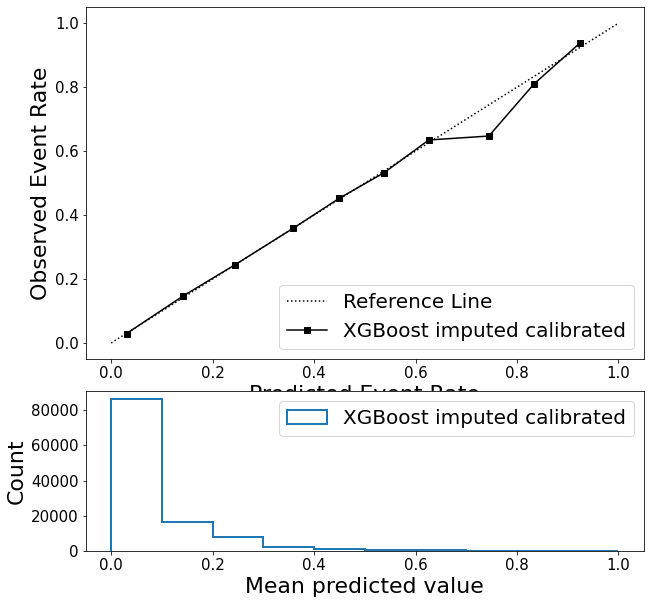

In [15]:
onc_plot_calibration_curve(
                y_true=calibrated_results.y, 
                y_proba=calibrated_results.p_calibrated, 
                label='XGBoost imputed calibrated',
                filename='./roc_results/xgb_imputed_calibrated')

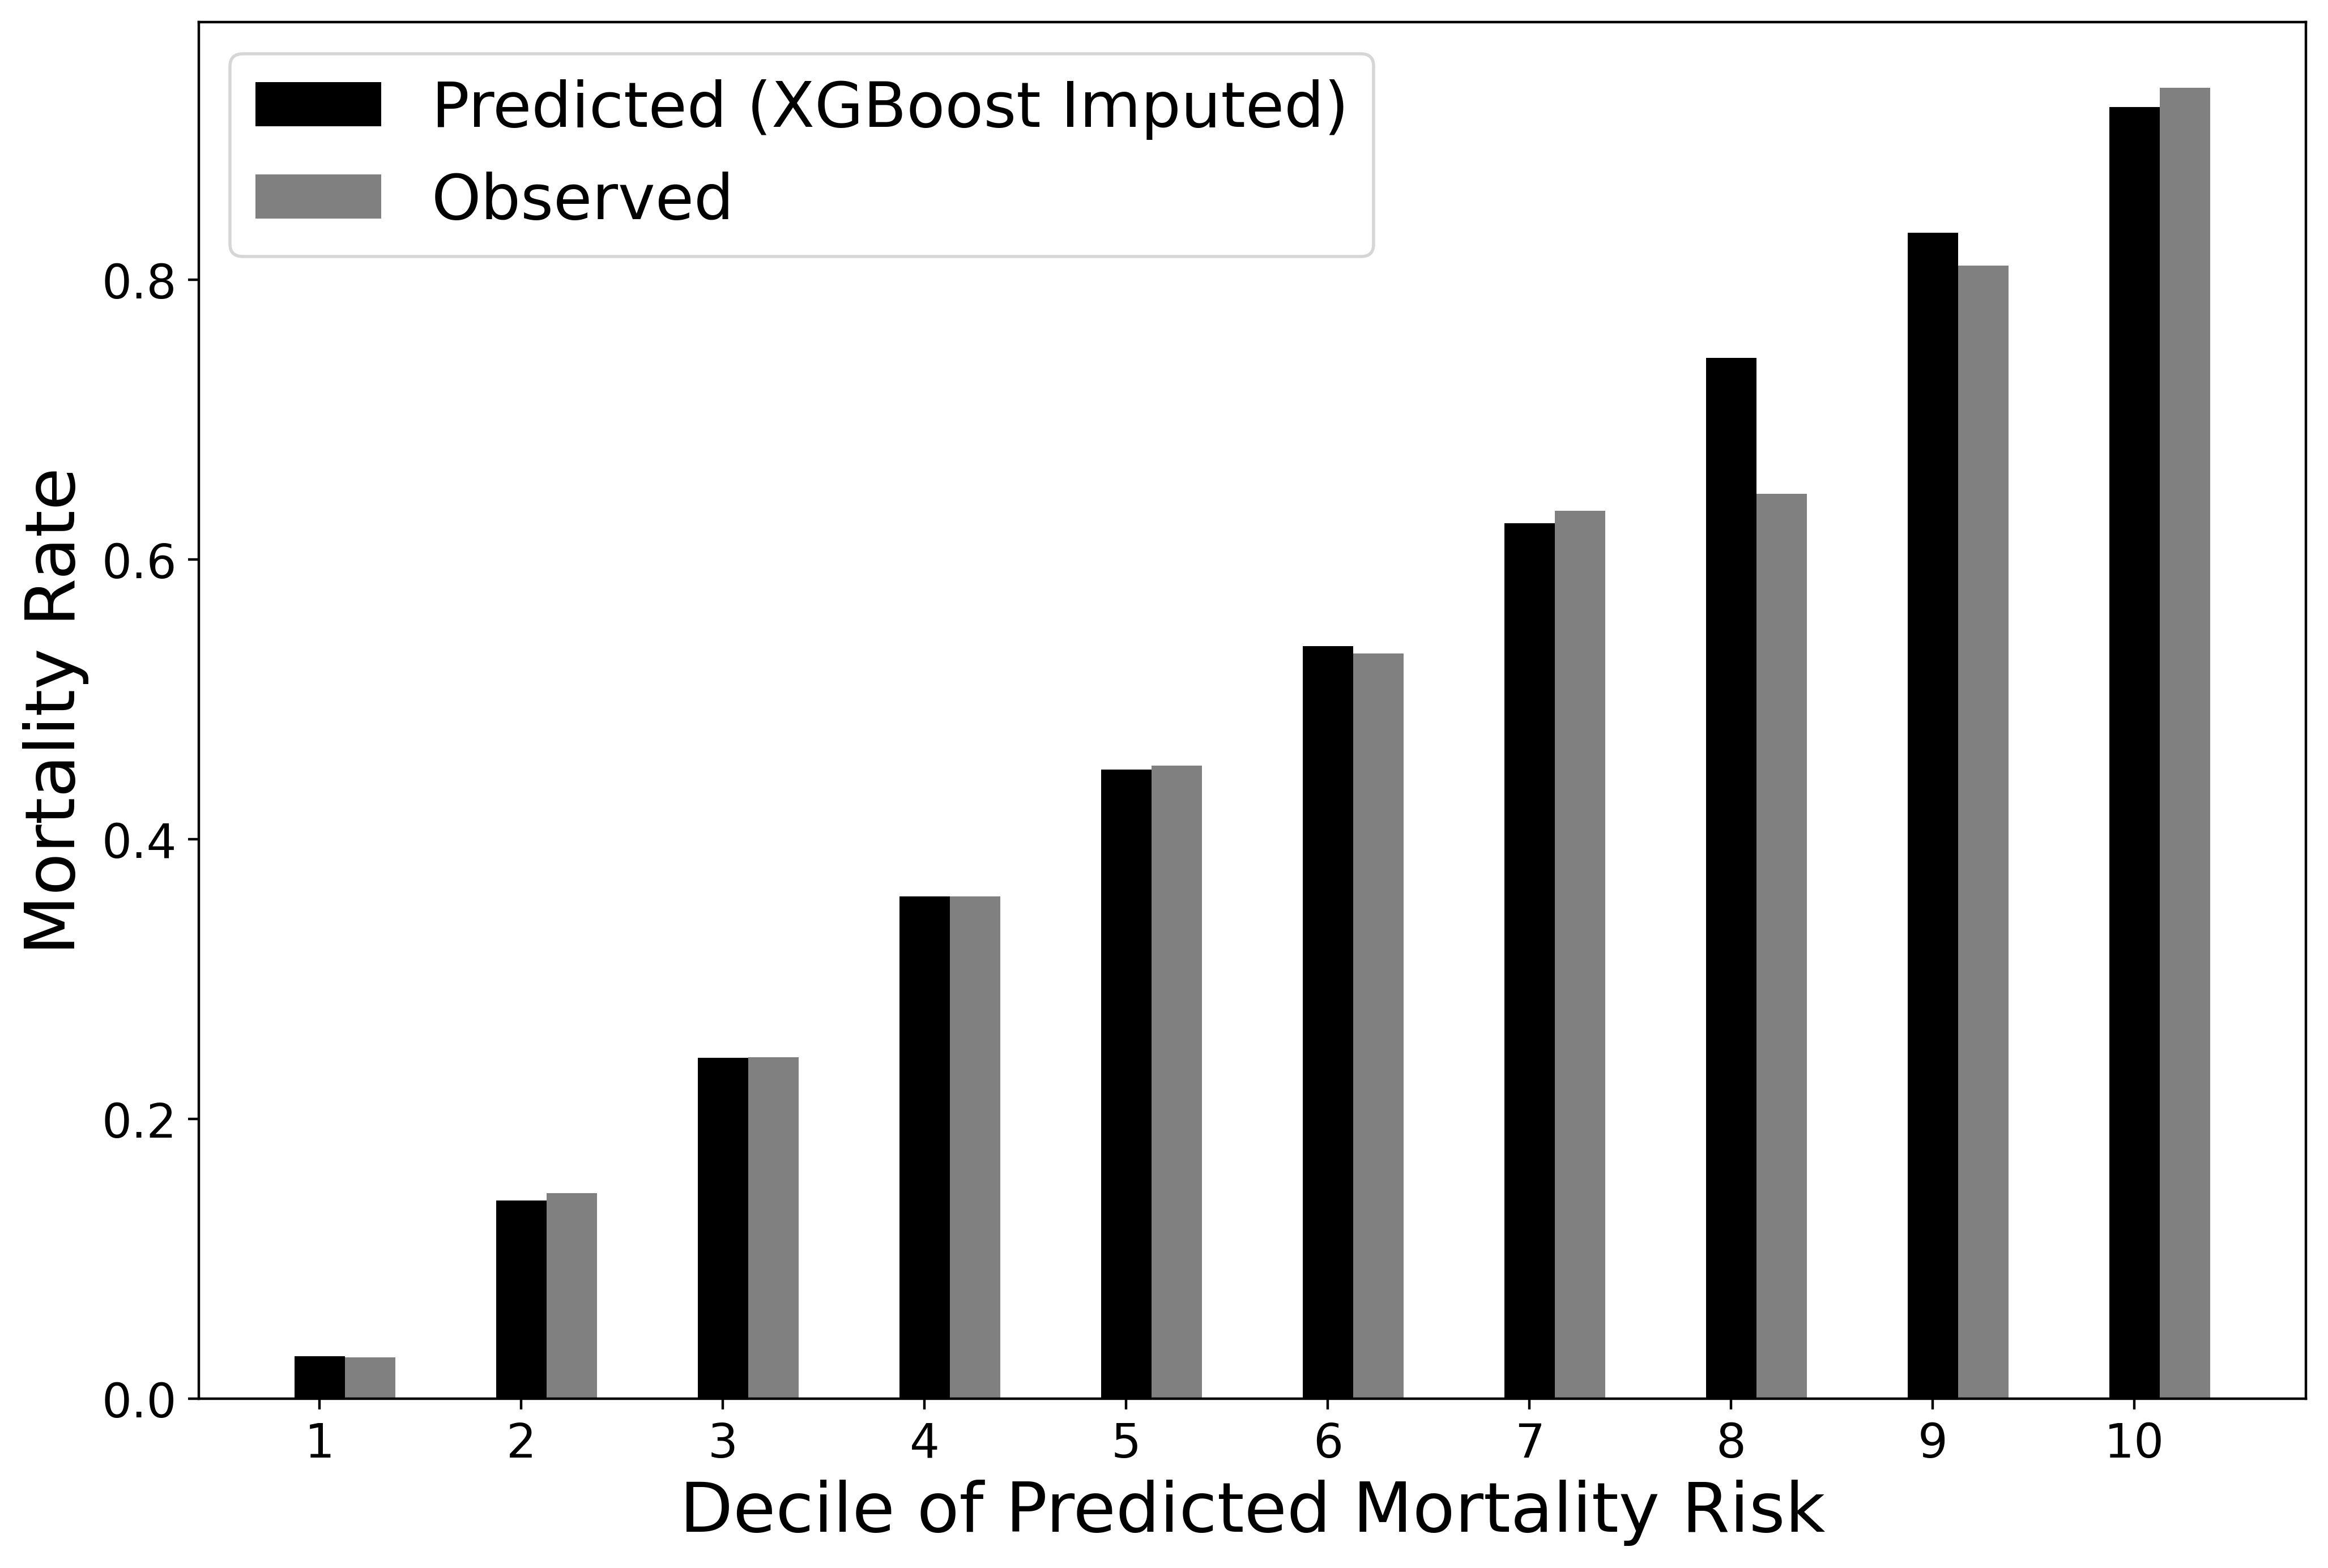

In [16]:
onc_plot_risk(
    y_true=calibrated_results.y, 
    y_proba=calibrated_results.p_calibrated,
    label='Predicted (XGBoost Imputed)',
    filename='xgb_imputed_mortality_bar')

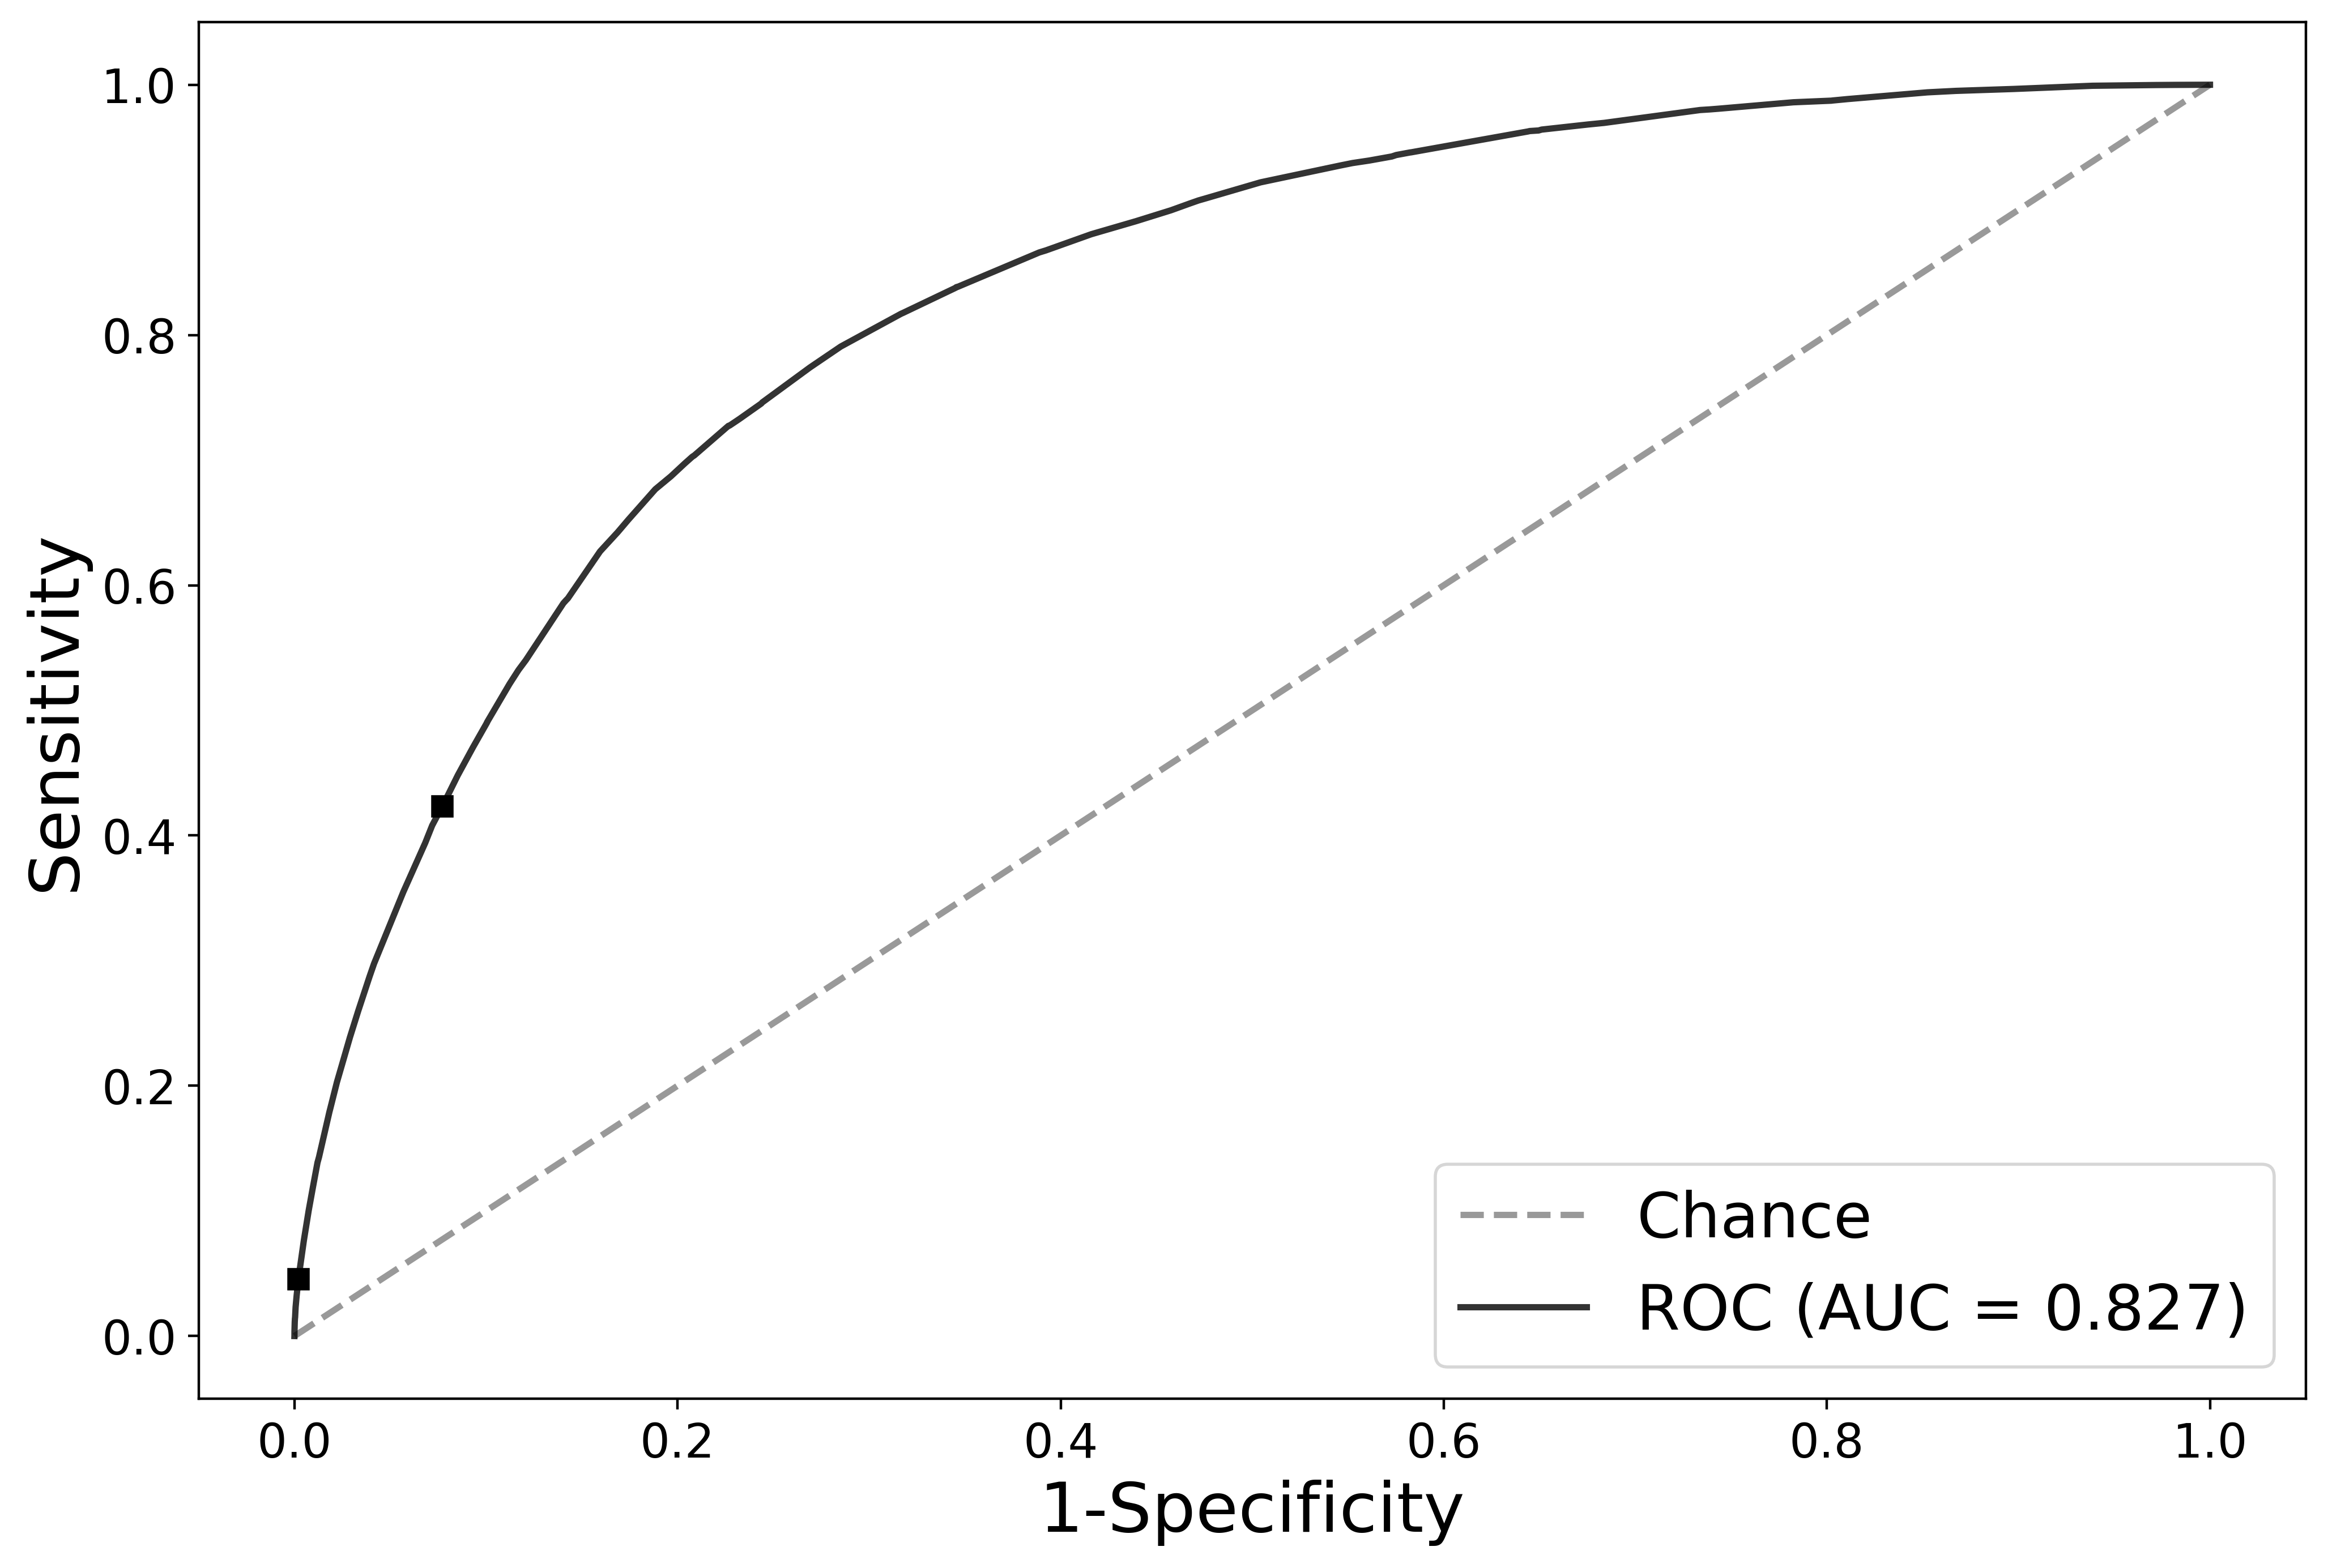

In [17]:
onc_plot_roc(
            y_true=calibrated_results.y, 
            y_pred=calibrated_results.p_calibrated, 
            model_name='xgb_imputed');

In [18]:
cm = onc_calc_cm(
    calibrated_results.y,
    calibrated_results.p_calibrated, 
    range_probas=[.10,.20, .30, .40, .50])
cm

,threshold,sensitivity,specificity,likelihood_ratio_neg,likelihood_ratio_pos,tp,fp,tn,fn,total_survived,total_deceased
0.1,0.1,0.703327,0.791696,0.37473,3.37644,6024,22134,84124,2541,106258,8565
0.2,0.2,0.423234,0.922829,0.624997,5.48439,3625,8200,98058,4940,106258,8565
0.3,0.3,0.202919,0.977818,0.815163,9.14796,1738,2357,103901,6827,106258,8565
0.4,0.4,0.100409,0.992556,0.906338,13.4883,860,791,105467,7705,106258,8565
0.5,0.5,0.0451839,0.997939,0.956788,21.9231,387,219,106039,8178,106258,8565


In [19]:
#save (for the aucroc evaluated model)
cm.to_csv('./roc_results/2021_xgb_imputed_calibrated_confusion_matrix.csv')